In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
file = "./DEA_results_OU.tsv"
df_dea = pd.read_csv(file, sep="\t")
df_dea = df_dea.sort_values(by='gene')
df_dea.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,18,1,2.028402,3.354770e-13,1.765668e-12,True
1,34,2,1.467696,5.681450e-11,1.623271e-10,True
2,25,3,1.679700,8.197438e-12,3.152861e-11,True
3,87,4,1.087548,4.503688e-04,5.117828e-04,True
4,68,5,1.129974,1.197272e-07,1.735177e-07,True
5,98,6,0.128023,8.822695e-01,8.822695e-01,False
6,78,7,0.932673,1.254327e-05,1.587756e-05,True
7,99,8,0.083811,2.119538e-01,2.140948e-01,False
8,59,9,1.568818,6.016261e-09,1.002710e-08,True
9,96,10,0.451199,5.818702e-02,5.998662e-02,False


In [4]:
file = "./DEA_results_BM.tsv"
df_dea_BM = pd.read_csv(file, sep="\t")
df_dea_BM = df_dea_BM.sort_values(by='gene')
df_dea_BM.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,21,1,0.639172,4.583718e-03,1.065981e-02,True
1,50,2,0.138046,9.480978e-01,9.597644e-01,False
2,25,3,0.614026,1.861205e-02,3.511708e-02,True
3,58,4,-0.195675,4.830492e-01,5.750586e-01,False
4,70,5,-0.418325,3.274953e-02,5.550768e-02,False
5,95,6,-1.382283,2.686968e-06,1.791312e-05,True
6,71,7,-0.797344,2.710512e-02,4.755284e-02,True
7,3,8,1.800040,5.500859e-12,1.375215e-10,True
8,5,9,1.774854,1.747090e-09,2.911816e-08,True
9,75,10,-0.867779,1.331370e-02,2.662741e-02,True


In [5]:
# EGX result
file = "./EGX_readcounts_OU_long.csv"
df_egx = pd.read_csv(file)
df_egx["ou2_theta"] = df_egx["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,4.067560,1.000000e-10,0.469135,11.157470,-506.329257,1,2.979717e+00,1.486813e-09,0.369501,15.409882,-502.471928,1,4.067560,0.469136,11.157459,-506.329257,2.112436e-02,5.477428e-03,2.112436e-02,True
1,1,1,4.067560,1.000000e-10,0.469135,11.157470,-506.329257,1,1.928707e+08,1.486813e-09,0.369501,15.409882,-502.471928,1,4.067560,0.469136,11.157459,-506.329257,2.112436e-02,5.477428e-03,2.112436e-02,True
2,2,1,6.358818,3.095476e-10,0.330242,17.923239,-501.171372,1,5.708141e+00,1.599200e-03,0.304611,19.913169,-499.482531,1,6.358818,0.330243,17.923217,-501.171372,1.847336e-01,6.608499e-02,1.847336e-01,False
3,2,1,6.358818,3.095476e-10,0.330242,17.923239,-501.171372,1,1.114071e+02,1.599200e-03,0.304611,19.913169,-499.482531,1,6.358818,0.330243,17.923217,-501.171372,1.847336e-01,6.608499e-02,1.847336e-01,False
4,3,1,5.103487,5.190952e-10,0.523811,10.935394,-515.876734,1,4.149058e+00,2.424627e-02,0.703023,7.756938,-512.427840,1,5.103487,0.523815,10.935262,-515.876735,3.178075e-02,8.630242e-03,3.178075e-02,True
5,3,1,5.103487,5.190952e-10,0.523811,10.935394,-515.876734,1,1.852424e+01,2.424627e-02,0.703023,7.756938,-512.427840,1,5.103487,0.523815,10.935262,-515.876735,3.178075e-02,8.630242e-03,3.178075e-02,True
6,4,1,7.791128,1.349246e-10,1.004200,4.843125,-538.355503,1,7.084955e+00,1.357856e-09,0.980013,5.033718,-537.659118,1,7.791128,1.004201,4.843106,-538.355503,4.983837e-01,2.379379e-01,4.983837e-01,False
7,4,1,7.791128,1.349246e-10,1.004200,4.843125,-538.355503,1,1.366534e+08,1.357856e-09,0.980013,5.033718,-537.659118,1,7.791128,1.004201,4.843106,-538.355503,4.983837e-01,2.379379e-01,4.983837e-01,False
8,5,1,8.017644,6.762558e-10,0.751377,10.660137,-549.428786,1,7.080198e+00,2.030972e-09,0.694374,11.837908,-547.777104,1,8.017644,0.751377,10.660138,-549.428786,1.917272e-01,6.913818e-02,1.917272e-01,False
9,5,1,8.017644,6.762558e-10,0.751377,10.660137,-549.428786,1,1.209756e+08,2.030972e-09,0.694374,11.837908,-547.777104,1,8.017644,0.751377,10.660138,-549.428786,1.917272e-01,6.913818e-02,1.917272e-01,False


In [6]:
# EGX result
file = "./EGX_readcounts_BM_long.csv"
df_egx_BM = pd.read_csv(file)
df_egx_BM["ou2_theta"] = df_egx_BM["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx_BM

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,5.456388e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
1,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,7.485209e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
2,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,6.429353e+00,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
3,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,1.000000e-01,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
4,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,5.603041e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
5,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,3.724019e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
6,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,4.964337e+00,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
7,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,1.000000e-01,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
8,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,5.440609e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False
9,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,4.203868e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False


In [7]:
# OUP
file = "./OUP_OU_chi-squared.tsv"
df_oup = pd.read_csv(file, sep="\t")
#df_oup["theta0"] = df_oup["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["1"] = df_oup["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["2"] = df_oup["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup

,ID,gene,h0_theta,h1_theta1,h1_theta2,h0,h1,LR,p,q,signif
0,20,21,0.143287,0.012675,12.503981,-360.09070,-382.62780,22.537110,0.000002,0.000206,True
1,51,52,5.367012,3.980849,12.931515,-1135.75420,-1146.38700,10.632812,0.001111,0.038508,True
2,69,70,0.050165,0.005156,10.935780,-192.20677,-202.76735,10.560577,0.001155,0.038508,True
3,10,11,7.071160,5.942245,12.136106,-1353.72880,-1363.27310,9.544312,0.002006,0.050143,False
4,82,83,4.329550,2.703618,12.986480,-1066.35800,-1075.25770,8.899658,0.002852,0.057045,False
5,89,90,1.171249,0.231439,12.987859,-593.48663,-601.78760,8.300964,0.003962,0.063001,False
6,23,24,1.427724,0.402020,13.087840,-798.42280,-806.10645,7.683655,0.005572,0.063001,False
7,47,48,1.861360,0.526239,13.128935,-708.50604,-716.07830,7.572266,0.005927,0.063001,False
8,87,88,3.064006,1.814475,9.835761,-543.75040,-551.31380,7.563354,0.005957,0.063001,False
9,37,38,9.185208,8.475539,12.692852,-2164.76900,-2172.23140,7.462402,0.006300,0.063001,False


In [8]:
# OUP
file = "./OUP_BM_chi-squared.tsv"
df_oup_BM = pd.read_csv(file, sep="\t")
#df_oup_BM["theta0"] = df_oup_BM["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["1"] = df_oup_BM["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["2"] = df_oup_BM["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup_BM

,ID,gene,theta0,1,2,h0,h1,LR,p,q,signif
0,60,61,5.427157,3.258930,18.660685,-1614.464400,-1621.539700,7.075317,0.007815,0.684175,False
1,69,70,4.581400,3.253484,11.902768,-986.507000,-991.298700,4.791687,0.028597,0.684175,False
2,85,86,2.974371,1.626855,10.960412,-876.719240,-881.444700,4.725464,0.029719,0.684175,False
3,27,28,3.385254,4.640019,-3.767806,-642.291140,-646.972100,4.680969,0.030499,0.684175,False
4,63,64,3.248313,4.585419,-3.927209,-479.909270,-484.367250,4.457977,0.034739,0.684175,False
5,88,89,4.861964,6.291705,-2.118084,-1028.597800,-1032.710200,4.112427,0.042569,0.684175,False
6,13,14,4.349609,5.305522,-1.460607,-762.894650,-766.252400,3.357727,0.066890,0.684175,False
7,17,18,5.080758,3.666175,13.229636,-1303.331400,-1306.683600,3.352173,0.067116,0.684175,False
8,31,32,5.203930,6.021127,0.994399,-899.372800,-902.682600,3.309814,0.068867,0.684175,False
9,66,67,-0.797555,-1.756561,3.789202,4.061394,0.796059,3.265335,0.070759,0.684175,False


In [9]:
# DEA
truth = np.array([True]*100 + [False]*100)

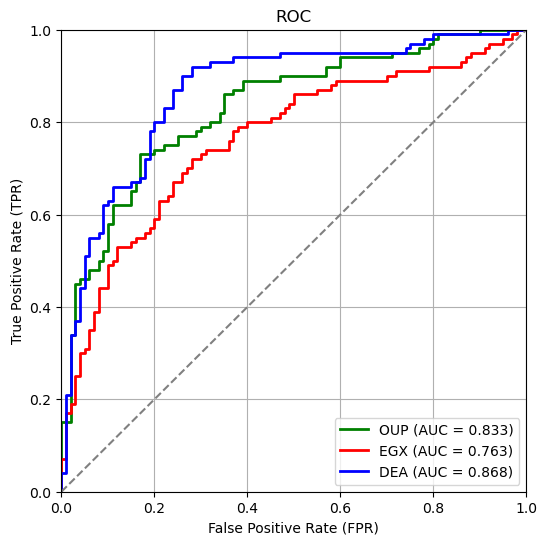

In [10]:
# DEA: Compute ROC curve and AUC
p_dea = np.concatenate((df_dea["p_value"].values, df_dea_BM["p_value"].values))
fpr1, tpr1, _ = roc_curve(~truth, p_dea)
roc_auc1 = auc(fpr1, tpr1)

# EGX: Compute ROC curve and AUC
p_egx = np.concatenate((df_egx["ou2_vs_ou1_pvalue"].iloc[::2].values, df_egx_BM["ou2_vs_ou1_pvalue"].iloc[::2].values))
fpr2, tpr2, _ = roc_curve(~truth, p_egx)
roc_auc2 = auc(fpr2, tpr2)

# EGX: Compute ROC curve and AUC
p_oup = np.concatenate((df_oup["p"].values, df_oup_BM["p"].values))
fpr3, tpr3, _ = roc_curve(~truth, p_oup)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'OUP (AUC = {roc_auc3:.3f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'EGX (AUC = {roc_auc2:.3f})')
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'DEA (AUC = {roc_auc1:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('ROC_p.png')

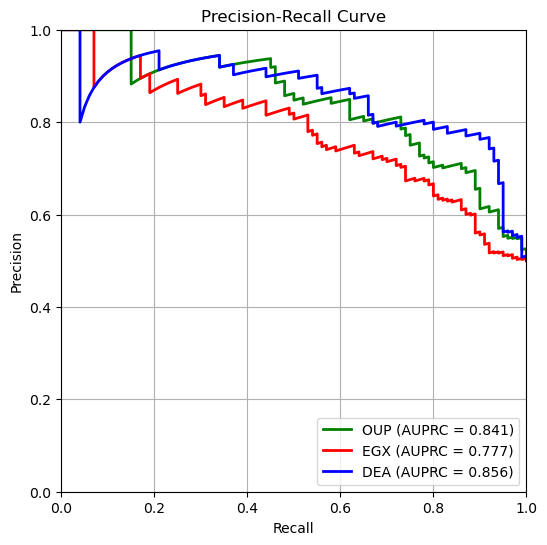

In [11]:
# DEA: Compute Precision-Recall curve and AUC
precision1, recall1, _ = precision_recall_curve(~truth, p_dea)
roc_auc1 = auc(recall1, precision1)

# EGX: Compute Precision-Recall curve and AUC
precision2, recall2, _ = precision_recall_curve(~truth, p_egx)
roc_auc2 = auc(recall2, precision2)

# OUP: Compute Precision-Recall curve and AUC
precision3, recall3, _ = precision_recall_curve(~truth, p_oup)
roc_auc3 = auc(recall3, precision3)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall3, precision3, color='green', lw=2, label=f'OUP (AUPRC = {roc_auc3:.3f})')
plt.plot(recall2, precision2, color='red', lw=2, label=f'EGX (AUPRC = {roc_auc2:.3f})')
plt.plot(recall1, precision1, color='blue', lw=2, label=f'DEA (AUPRC = {roc_auc1:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Precision_Recall_p.png')
plt.show()